# Machine Learning Project - First Draft

## Introduction
In this project, we aim to develop different models throughout different classification techniques that counts the number of raised fingers, and which hand is used. Finger detection and counting is an important feature of many computer vision applications, it could be used as a beginning for translating sign language, and the future of hand gestures is very promising, like the hand gestures that google tried to implement in their pixel phone. We used Python to code our models and we used a dataset(fingers) made by 'koryakinp' which is on Kaggle.



---
## Dataset description
21600 images of left and right hands fingers.
### Images specification
1.   All images are 128 by 128 pixels.
2.   Training set: 18000 images.
3.   Test set: 3600 images.
4.   Images are centered by the center of mass.
5.   Noise pattern on the background.

### Labels
Labels are in 2 last characters of a file name. L/R indicates left/right hand; 0,1,2,3,4,5 indicates number of fingers.

The dataset is available on kaggle.
<br>Dataset url: https://www.kaggle.com/koryakinp/fingers

## Classification techniques to be applied on the selected dataset:
1. Logistic regression
2. KNN
3. Multilayer perceptron (MLP)
4. Naive Bayes
5. Support vector machine (SVM)
6. Decision tree
---
---

## Clustering techniques to be applied on the selected dataset:
1. K-means


# Data Preproccesing

In [6]:
import os
data_train_dir = 'train/'
data_test_dir = 'test/'

# A list to store the paths of training examples
train_paths = []
# A list to store the paths of training labels
train_labels = []

# Loop over all the files(image) in the train dir
for filename in os.listdir(data_train_dir):
    # Add the path of the file(image) to the list
    train_paths.append(data_train_dir+filename)
    # Extract the label of the image from the path
    whole_label = filename.split('_')[1]
    # Remove the file format(.png) from the label
    useful_label = whole_label.split('.')[0]
    # Add the label to the list
    train_labels.append(useful_label)

print("Number of train paths: ", len(train_paths))
print("First 6 labels: ", train_labels[:6])

# A list to store the paths of testing examples
test_paths = []
# A list to store the paths of testing labels
test_labels = []

# Loop over all the files(image) in the test dir
# to extract the paths and the labels
for filename in os.listdir(data_test_dir):

    test_paths.append(data_test_dir+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    test_labels.append(useful_label)

print("Number of test paths: ", len(test_paths))
print("First 6 labels: ", test_labels[:6])

Number of train paths:  18000
First 6 labels:  ['0L', '0L', '2L', '0L', '5L', '5R']
Number of test paths:  3600
First 6 labels:  ['5L', '5L', '3R', '5L', '5L', '4R']


<class 'PIL.Image.Image'>
None
RGB
(128, 128)


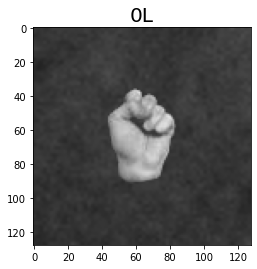

In [7]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
# Check first image in the train_paths
# Load the image
img = load_img(train_paths[0])
# Report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# Show the image
plt.imshow(img)
plt.title(train_labels[0], fontsize = 20)
plt.show()

<class 'PIL.Image.Image'>
None
RGB
(128, 128)


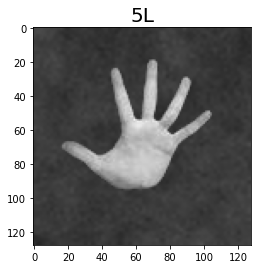

In [8]:
# Check first image in the test_paths
# load the image
img = load_img(test_paths[0])
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)
plt.title(test_labels[0], fontsize = 20)
plt.show()

In [9]:
from keras.preprocessing.image import img_to_array
import numpy as np

X_train, X_test = [],[]

# Loop over all the paths in train_paths
for image_path in train_paths:
    # Load the image
    image = load_img(image_path)
    # Convert the image into an array# Load the image
    image_array = img_to_array(image)
    # Flatten the array (make it one-dimensional)
    image_array = image_array.flatten()
    # Append the image into the X_train list
    X_train.append(image_array)

# Loop over all the paths in test_paths
for image_path in test_paths:
    # Load the image
    image = load_img(image_path)
    # Convert the image into an array# Load the image
    image_array = img_to_array(image)
    # Flatten the array (make it one-dimensional)
    image_array = image_array.flatten()
    # Append the image into the X_test list
    X_test.append(image_array)

# Convert X_train and X_test lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [10]:
# Check the shapes of X_train and X_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (18000, 49152)
Shape of X_test:  (3600, 49152)


In [11]:
# Encode the textual labels (e.g: 0L,2R,...) with numerical values between
# zeros and number of classes - 1
from sklearn.preprocessing import LabelEncoder
from joblib import dump
encoder  = LabelEncoder()
# Fit label encoder to train labels
encoder.fit(train_labels)
# Print the label for each class
print(list(encoder.classes_))
# Transform labels to normalized encoding
Y_train = encoder.transform(train_labels)
Y_test = encoder.transform(test_labels)
dump(encoder,'encoder.joblib')

['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']


['encoder.joblib']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,Y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
dump(scaler,'scaler.joblib')

['scaler.joblib']

# Classification Models

## Logistic regression
In this section we are going to implement a logistic regression model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=10000,C=0.5)
logistic_regression_model.fit(X_train,Y_train)

In [ ]:
acc = logistic_regression_model.score(X_test,Y_test)
print(acc)

In [ ]:
Y_pred = logistic_regression_model.predict(X_test)

In [ ]:
Y_pred

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred,average='micro')
print('Precision = ', precision)

In [ ]:
from joblib import dump
dump(logistic_regression_model,'logistic_regression_model.joblib')

## Decision Tree
In this section we are going to implement a decision tree model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=12)
decision_tree_classifier.fit(X_train,Y_train)


In [ ]:
Y_pred_DT = decision_tree_classifier.predict(X_test)

In [ ]:
Y_pred_DT

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred_DT)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred_DT,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred_DT,average='micro')
print('Precision = ', precision)

In [ ]:
dump(decision_tree_classifier,'decision_tree_classifier.joblib')

## Multi-layer Perceptron
In this section we are going to implement a multi-layer perceptron model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

MLP_classifier = Sequential()
MLP_classifier.add(Dense(300, activation="relu"))
MLP_classifier.add(Dense(100, activation="relu"))
MLP_classifier.add(Dense(12, activation="softmax"))
MLP_classifier.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(Y_train,12)
y_test_categorical = to_categorical(Y_test,12)
history = MLP_classifier.fit(X_train, y_train_categorical, epochs=1000, batch_size=18, validation_data=(X_test, y_test_categorical), verbose=0)
_, acc = MLP_classifier.evaluate(X_test, y_test_categorical, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
# Save the MLP classifier
MLP_classifier.save('MLP_classifier.h5')

## K Nearest Neighbors (KNN)
In this section we are going to implement a k nearest neighbors (knn) model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train,Y_train)

In [ ]:
Y_pred_knn = knn_classifier.predict(X_test)
Y_pred_knn

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred_knn)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred_knn,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred_knn,average='micro')
print('Precision = ', precision)

In [ ]:
from joblib import dump
dump(knn_classifier,'knn_classifier.joblib')

## Gaussian Naive Bayes (GaussianNB)
In this section we are going to implement a Gaussian Naive Bayes (GaussianNB) model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train,Y_train)

In [ ]:
Y_pred_gnb = gnb_classifier.predict(X_test)
Y_pred_gnb

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred_gnb)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred_gnb,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred_gnb,average='micro')
print('Precision = ', precision)

In [ ]:
from joblib import dump
dump(gnb_classifier,'gnb_classifier.joblib')

## Support Vector Machine (SVM)
In this section we are going to implement a Support Vector Machine (SVM) model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
svm_classifier.fit(X_train,Y_train)

In [ ]:
Y_pred_svm = svm_classifier.predict(X_test)
Y_pred_svm

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred_svm)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred_svm,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred_svm,average='micro')
print('Precision = ', precision)

In [ ]:
from joblib import dump
dump(svm_classifier,'svm_classifier.joblib')

# Clustering Models

## K-Means
In this section we are going to implement a K-Means model to classify a given hand image based on the number of fingers in that image.

In [ ]:
from sklearn.cluster import KMeans

kmeans_classifier = KMeans(12)
kmeans_classifier.fit(X_train,Y_train)

In [ ]:
Y_pred_svm = kmeans_classifier.predict(X_test)
Y_pred_svm

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,Y_pred_svm)
print('Accuracy = ', acc)

In [ ]:
recall = metrics.recall_score(Y_test,Y_pred_svm,average='micro')
print('Recall = ', recall)

In [ ]:
precision = metrics.precision_score(Y_test,Y_pred_svm,average='micro')
print('Precision = ', precision)

In [ ]:
from joblib import dump
dump(kmeans_classifier,'kmeans_classifier.joblib')

## Load the models

In [ ]:
from joblib import load
from tensorflow.keras.models import load_model
MLP = load_model('C:\\Users\\Ali\\MLP_classifier.h5')
logistic_regression = load('logistic_regression_model.joblib')
DT = load('decision_tree_classifier.joblib')
# The model size is 10Gb so it could takes some time and RAM space
# KNN = load('knn_classifier.joblib')
GNB = load('gnb_classifier.joblib')
SVM = load('svm_classifier.joblib')

# Principal component analysis (PCA)